# Setup

## install

In [ ]:
!pip install langchain langchain_openai langchain_community faiss-cpu rank_bm25

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Successfully uninstalled langchain-0.3.19


## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'sk-'


## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/5. Large Language Models/data/vector_db/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


# Loader

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"nlp-keywords.txt")

docs = loader.load()
len(docs)

1

# Splitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=600, chunk_overlap=0)

In [ ]:
split_doc1 = text_splitter.split_documents(docs)
len(split_doc1)

11

# Embedding

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Vector DB

In [ ]:
import faiss
from langchain_community.vectorstores import FAISS

In [ ]:
# DB 생성
db = FAISS.from_documents(
    documents=split_doc1, embedding=embeddings)

# [Retriever](https://python.langchain.com/docs/how_to/#retrievers)
- Retrieval Augmented Generation (RAG)에서 `검색도구(Retrievers)` 는 벡터 저장소에서 문서를 검색하는 도구입니다.
- LangChain은 간단한 의미 검색도구부터 성능 향상을 위해 고려된 다양한 검색 알고리즘을 지원합니다.

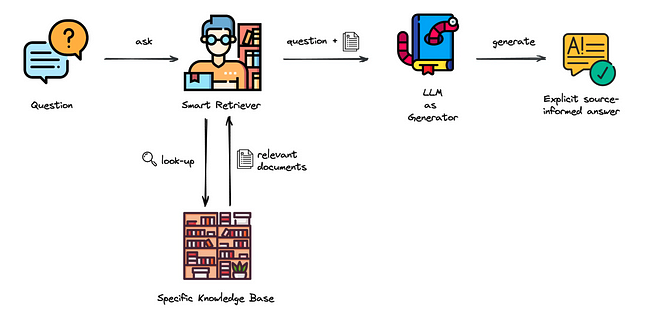

## [벡터스토어 기반 검색기](https://wikidocs.net/234016)
- VectorStore 지원 검색기 는 vector store를 사용하여 문서를 검색하는 retriever입니다.
- Vector store에 구현된 `유사도 검색(similarity search)` 이나 `MMR` 과 같은 검색 메서드를 사용하여 vector store 내의 텍스트를 쿼리합니다.

### Retriever
- as_retriever 메서드는 VectorStore 객체를 기반으로 VectorStoreRetriever를 초기화하고 반환합니다. 이 메서드를 통해 다양한 검색 옵션을 설정하여 사용자의 요구에 맞는 문서 검색을 수행할 수 있습니다.
- 매개변수(parameters)
  - `**kwargs`: 검색 함수에 전달할 키워드 인자
  - `search_type`: 검색 유형 ("similarity", "mmr", "similarity_score_threshold")
  - `search_kwargs`: 추가 검색 옵션
  - `k`: 반환할 문서 수 (기본값: 4)
  - `score_threshold`: similarity_score_threshold 검색의 최소 유사도 임계값
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
  - `lambda_mult`: MMR 결과의 다양성 조절 (0-1 사이, 기본값: 0.5)
  - `filter`: 문서 메타데이터 기반 필터링

In [ ]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
retriever = db.as_retriever()


- `invoke 메서드`는 Retriever의 주요 진입점으로, 관련 문서를 검색하는 데 사용됩니다. 이 메서드는 동기적으로 Retriever를 호출하여 주어진 쿼리에 대한 관련 문서를 반환합니다.
- 매개변수(parameters)
  - `input`: 검색 쿼리 문자열
  - `config`: Retriever 구성 (Optional[RunnableConfig])
  - `**kwargs`: Retriever에 전달할 추가 인자

In [ ]:
# 관련 문서를 검색
docs = retriever.invoke(input="TF IDF 에 대하여 알려줘")

for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

#### MMR
- MMR(Maximal Marginal Relevance) 방식은 쿼리에 대한 관련 항목을 검색할 때 검색된 문서의 중복 을 피하는 방법 중 하나입니다.
- 단순히 가장 관련성 높은 항목들만을 검색하는 대신, MMR은 쿼리에 대한 문서의 관련성 과 이미 선택된 문서들과의 차별성을 동시에 고려 합니다.
  - `search_type`: `"mmr"` 로 설정하여 MMR(Maximal Marginal Relevance) 검색 알고리즘을 사용합니다.
  - `k`: 반환할 문서 수 (기본값: 4)
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
  - `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5, 0: 유사도 점수만 고려, 1: 다양성만 고려)

In [ ]:
# MMR(Maximal Marginal Relevance) 검색 유형을 지정
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 2, "fetch_k": 10, "lambda_mult": 0.6}
)

In [ ]:
# 관련 문서를 검색합니다.
docs = retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")

정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
GPT (Generative Pretrained Transformer)

정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.
예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 GPT 모델을 사용할 수 있습니다.
연관키워드: 자연어 처리, 텍스트 생성, 딥러닝

InstructGPT

정의: InstructGPT는 사용자의 지시에 따라 특정한 작업을 수행하기 위해 최적화된 GPT 모델입니다. 이 모델은 보다 정확하고 관련성 높은 결과를 생성하도록 설계되었습니다.
예시: 사용자가 "이메일 초안 작성"과 같은 특정 지시를 제공하면, InstructGPT는 관련 내용을 기반으로 이메일을 작성합니다.
연관키워드: 인공지능, 자연어 이해, 명령 기반 처리

Keyword Search


#### 유사도 점수 임계값 검색
- 유사도 점수 임계값을 설정하고 해당 임계값 이상의 점수를 가진 문서만 반환하는 검색 방법을 설정할 수 있습니다.
- 임계값을 적절히 설정함으로써 관련성이 낮은 문서를 필터링 하고, 질의와 가장 유사한 문서만 선별 할 수 있습니다.
  - `search_type` 매개변수를 `"similarity_score_threshold"` 로 설정하여 유사도 점수 임계값을 기준으로 검색을 수행합니다.
  - `search_kwargs` 매개변수에 `{"score_threshold": 0.8}`를 전달하여 유사도 점수 임계값을 0.8로 설정합니다. 이는 검색 결과의 유사도 점수가 0.8 이상인 문서만 반환됨 을 의미합니다.

In [ ]:
retriever = db.as_retriever(
    # 검색 유형을 "similarity_score_threshold 으로 설정
    search_type="similarity_score_threshold",
    # 임계값 설정
    search_kwargs={"score_threshold": 0.3},
)


In [ ]:
# 관련 문서를 검색
for doc in retriever.invoke("TF IDF 에 대하여 알려줘"):
    print(doc.page_content)
    print("=========================================================")


/usr/local/lib/python3.11/dist-packages/langchain_core/vectorstores/base.py:1077: UserWarning: Relevance scores must be between 0 and 1, got [(Document(id='d6ba9866-3e6b-4168-bf5a-dc44cd55841e', metadata={'source': '/content/data/MyDrive/ai_lecture/5. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'), 0.07457271211441552), (Document(id='32640572-3e92-4d87-944f-f273cf4d5fcd', metadata={'source': '/content/data/MyDrive/ai_lecture/5. Larg

#### top_k
- 검색 시 사용할 k 와 같은 검색 키워드 인자(kwargs)를 지정할 수 있습니다.
  - `k` 매개변수는 검색 결과에서 반환할 상위 결과의 개수를 나타냅니다.
  - `search_kwargs`에서 k 매개변수를 1로 설정하여 검색 결과로 반환할 문서의 수를 지정합니다.

In [ ]:
# k 설정
retriever = db.as_retriever(search_kwargs={"k": 1})


In [ ]:
# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘")

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame


#### 동적 설정(Configurable)
- 검색 설정을 동적으로 조정하기 위해 `ConfigurableField` 를 사용합니다.
- `ConfigurableField` 는 검색 매개변수의 고유 식별자, 이름, 설명을 설정하는 역할을 합니다.
- 검색 설정을 조정하기 위해 `config` 매개변수를 사용하여 검색 설정을 지정합니다.
- 검색 설정은 `config` 매개변수에 전달된 딕셔너리의 `configurable` 키에 저장됩니다.
- 검색 설정은 검색 쿼리와 함께 전달되며, 검색 쿼리에 따라 동적으로 조정됩니다.

In [ ]:
retriever = db.as_retriever()

In [ ]:
# 검색 설정을 지정. Faiss 검색에서 k=3로 설정하여 가장 유사한 문서 3개를 반환
config = {
    "configurable": {
        "search_kwargs": {"k": 3}
    }
}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

In [ ]:
# 검색 설정을 지정. score_threshold 0.8 이상의 점수를 가진 문서만 반환
config = {
    "configurable": {
        "search_type": "similarity_score_threshold",
        "search_kwargs": {
            "score_threshold": 0.8,
        },
    }
}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생

In [ ]:
# 검색 설정을 지정. mmr 검색 설정.
config = {
    "configurable": {
        "search_type": "mmr",
        "search_kwargs": {"k": 2, "fetch_k": 10, "lambda_mult": 0.6},
    }
}

# 관련 문서를 검색
docs = retriever.invoke("TF IDF 에 대하여 알려줘", config=config)

# 관련 문서를 검색
for doc in docs:
    print(doc.page_content)
    print("=========================================================")


정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.
예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.
연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝

Deep Learning

정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.
예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.
연관키워드: 인공신경망, 머신러닝, 데이터 분석

Schema

정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.
예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.
연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리

DataFrame
정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.
예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.
연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업

Structured Data

정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.
예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.
연관키워드: 데이터베이스, 데이터 분석, 데이터 모델링

Parser

정의: 파서는 주어진 데이터(문자열, 파일 등)를 분석하여 구조화된 형태로 변환하는 도구입니다. 이는 프로그래밍 언어의 구문 분석이나 파일 데이터 처리에 사용됩니다.
예시: HTML 문서를 구문 분석하여 웹 페이지의 DOM 구조를 생